# The Firefly Output

Here there is an example on how to read the best fit spectra output by Firefly.

In [20]:
import sys, os.path
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib notebook

Firefly has been run for the SDSS DR12 and DR14 galaxies. One of this output runs is available under the 'data' directory: 'spFly-0266-51630-0640.fits'. The name of this output contains the plate number, MJDid and fiberID in that order. Let's see the information of the global Firefly run:

In [21]:
file_path = 'example_data/spFly-0266-51630-0640.fits'

# Check that the file actually exists
if (not os.path.isfile(file_path)):
    print 'Not found: ', file_path
    sys.exit()

# Print the content of the file
header =  fits.open(file_path)
header.info()

Filename: example_data/spFly-0266-51630-0640.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   ()              
1                BinTableHDU    119   2872R x 4C   [D, D, D, D]   
2                BinTableHDU    107   2872R x 4C   [D, D, D, D]   
3                BinTableHDU    119   2872R x 4C   [D, D, D, D]   
4                BinTableHDU     95   2315R x 4C   [D, D, D, D]   
5                BinTableHDU     95   2315R x 4C   [D, D, D, D]   
6                BinTableHDU     95   2315R x 4C   [D, D, D, D]   
7                BinTableHDU    119   3714R x 4C   [D, D, D, D]   
8                BinTableHDU     95   3714R x 4C   [D, D, D, D]   
9                BinTableHDU     95   3714R x 4C   [D, D, D, D]   


Now, let's have a look at the parameters in the header

In [22]:
# Print the global information of the Firefly run: 
list_of_keys = header[0].header.keys()
for key in list_of_keys:
        print key,' = ',header[0].header[key]

SIMPLE  =  True
BITPIX  =  8
NAXIS  =  0
EXTEND  =  True
FILE  =  spFly-0266-51630-0640.fits
PLATE  =  0266
MJD  =  51630
FIBERID  =  0640.fits
MODELS  =  Maraston_2011
FITTER  =  FIREFLY
AGEMIN  =  6
AGEMAX  =  10
ZMIN  =  -3.0
ZMAX  =  1.0
REDSHIFT  =  0.019999301061
age_universe  =  13.512


Each of the binary tables that are not the primary are a Firefly run done with a different combination of IMF and stellar library input to the M11 models:

In [23]:
for i in [7,8,9]:
    print i, ', IMF=', header[i].header['IMF'],', Library=', header[i].header['MODEL']


7 , IMF= Chabrier , Library= STELIB
8 , IMF= Salpeter , Library= STELIB
9 , IMF= Kroupa , Library= STELIB


Here are all the parameters in the tables with the spectra output by Firefly:

In [24]:
list_of_keys = header[1].header.keys()
print(list_of_keys)

['XTENSION', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'PCOUNT', 'GCOUNT', 'TFIELDS', 'TTYPE1', 'TFORM1', 'TUNIT1', 'TTYPE2', 'TFORM2', 'TUNIT2', 'TTYPE3', 'TFORM3', 'TUNIT3', 'TTYPE4', 'TFORM4', 'TUNIT4', 'redshift', 'Age_unit', 'Metallicity_unit', 'Mass_unit', 'SSP_sfr', 'IMF', 'MODEL', 'converged', 'age_lightW', 'age_lightW_up_1sig', 'age_lightW_low_1sig', 'age_lightW_up_2sig', 'age_lightW_low_2sig', 'age_lightW_up_3sig', 'age_lightW_low_3sig', 'metallicity_lightW', 'metallicity_lightW_up_1sig', 'metallicity_lightW_low_1sig', 'metallicity_lightW_up_2sig', 'metallicity_lightW_low_2sig', 'metallicity_lightW_up_3sig', 'metallicity_lightW_low_3sig', 'age_massW', 'age_massW_up_1sig', 'age_massW_low_1sig', 'age_massW_up_2sig', 'age_massW_low_2sig', 'age_massW_up_3sig', 'age_massW_low_3sig', 'metallicity_massW', 'metallicity_massW_up_1sig', 'metallicity_massW_low_1sig', 'metallicity_massW_up_2sig', 'metallicity_massW_low_2sig', 'metallicity_massW_up_3sig', 'metallicity_massW_low_3sig', 'stell

Here there are the age, metallicities and stellar mass for the last Firefly run stored in this file

In [25]:
thefit = 9
key_info = ['age_lightW','age_massW','metallicity_lightW','metallicity_massW','stellar_mass']
units = ['Age_unit','Age_unit','Metallicity_unit','Metallicity_unit','Mass_unit']

for i,key in enumerate(key_info):
    print key,'(',header[thefit].header[units[i]],') = ',"{:.2f}".format(header[thefit].header[key])

age_lightW ( log (age/Gyr) ) =  -0.52
age_massW ( log (age/Gyr) ) =  -0.52
metallicity_lightW ( [Z/H] ) =  -0.26
metallicity_massW ( [Z/H] ) =  -0.27
stellar_mass ( log (M/Msun) ) =  7.69


Here there are the dust attenuation, as E(B-V), and the number of single stellar populations (SSPs) that were combined to make the best fit

In [26]:
key_info = ['EBV','ssp_number']

for key in key_info:
    print key,' = ',"{:.2f}".format(header[thefit].header[key])


EBV  =  0.14
ssp_number  =  2.00


The average star formation rate for each component can be obtained by simply dividing the stellar mass by the mass weighted age:

In [27]:
# Get the relevant data from the file
logM = header[thefit].header['stellar_mass']
logAge = header[thefit].header['age_massW']

log_sfr_av = logM - logAge
print 'log10(SFR_av/Msun/Gyr)=', log_sfr_av

log10(SFR_av/Msun/Gyr)= 8.20377311819


The instantaneous star formation rate can be approximated by using the stellar mass formed in the youngest SSP used in the fitting.

In [28]:
nssps = header[thefit].header['ssp_number']

# Create an empty array for the number of SSPs that have been used for the fit
logAge, logM = [np.zeros(shape=(nssps)) for i in range(2)]

# Get the values from each SSP
for i in range(nssps):
    logAge[i] = header[thefit].header['log_age_ssp_'+str(i)]
    logM[i] = header[thefit].header['stellar_mass_ssp_'+str(i)]

# Find the youngest SSP and use that one to get the instantaneous SFR
i = np.where(logAge == logAge.min())

log_sfr_i = logM[i] - logAge[i]
print 'log10(SFR_i/Msun/Gyr)=', log_sfr_i

log10(SFR_i/Msun/Gyr)= [ 7.3000975]


Let's plot the Firefly best fit against the original spectrum:

<IPython.core.display.Javascript object>


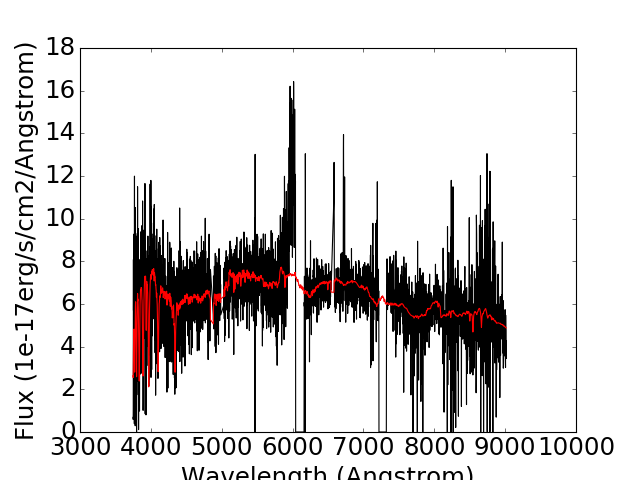

In [29]:
# Get the relevant data from the file
wavelength = header[thefit].data['wavelength']
original_flux = header[thefit].data['original_data']
bestfit_model = header[thefit].data['firefly_model']

# Create the labels of the plots using the units in the header file
xtit = ('Wavelength (%s)' % header[thefit].header['TUNIT1'])
ytit = ('Flux (%s)' % header[thefit].header['TUNIT2'])

# Plot the spectra
plt.plot(wavelength, original_flux, 'k')
plt.plot(wavelength, bestfit_model, 'r')

# Add labels and tick marks
fn = 22
plt.xlabel(xtit, fontsize=fn) ; plt.ylabel(ytit, fontsize=fn)
plt.tick_params(axis='both', which='major', labelsize=fn)
plt.show()